In [1]:
# First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from numpy import sqrt

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

# Let's format that to a more appropriate number of significant figures.  
# The first % means put the variable here.  The .2f means make it a float with 2 decimal places.
print('Hubble time = %.2f Gyr'%(1/H0y))

Hubble time =  13.976165695516954 Gyr
Hubble time = 13.98 Gyr


In [2]:
# Write a function for the integrand, i.e. $1/\dot{a}$ (adot inverse)
# I'm going to keep the constant H_0 outside the integral and add it later.
def adotinv_flatmatter(a):
    return np.sqrt(a) 

# First note some weird python notation, if you say "x, y = 1, 2" it's the same as saying "x=1" and "y=2".

# Now integrate that equation from scalefactor 0 to 1 (as an example) which will give the age of the universe today (because we define a so that a=1 today):
age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,1) 
# This returns age in Hubble times, and the uncertainty in the numerical integral

# Convert that to billions of years
age_Gyr = age_Hubble/H0y # Age in Gyr

print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_Gyr))
print('Does this match the analytic prediction of 2/3 Hubble times?  Yes!')
print('')
print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.') # It's good to check this to check that the integral has succeeded.

# Note, to get just the age without the uncertainty you can use [0] to get the first element that's returned,
# and then you can also divide by H0y immediately to get the age in one step
age_Gyr_easier = integrate.quad(adotinv_flatmatter,0,1)[0] / H0y 

print('Just checking that the one-step age calculation (%.2f Gyr) matches the two step one (%.2f Gyr).'%(age_Gyr_easier,age_Gyr))


Age of the universe in Hubble times = 0.667 which is 9.32 Gyr
Does this match the analytic prediction of 2/3 Hubble times?  Yes!

Uncertainty on the numerical integral is  7.401486830834379e-16 so should be negligible.
Just checking that the one-step age calculation (9.32 Gyr) matches the two step one (9.32 Gyr).


In [3]:
# Insert your code here
age_half_Gyr = integrate.quad(adotinv_flatmatter,0,0.5)[0] / H0y #coment this last bit out if youdont want it in hubble times...?
age_double_Gyr = integrate.quad(adotinv_flatmatter,0,2.0)[0] / H0y

# Remember to write print statements to see the answers.
print(age_half_Gyr)
print(age_double_Gyr)



3.294213846095611
26.353710768764888


In [4]:
# Start by making an array of scalefactors
astart = 0.0
astop = 2.1
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)
print('a_arr=',a_arr)

a_arr= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


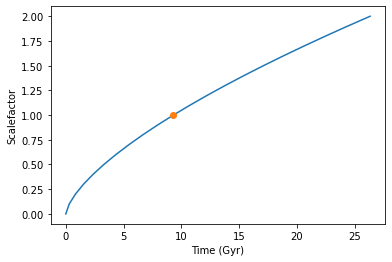

In [5]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Make a loop and do that integral for every final value of a (starting at a=0 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv_flatmatter,0,a_end)
    t_Gyr[i] = t_Hubble/H0y

# It's good practise to compare it to the analytic calculation when available
#t_analytic_Gyr = 'Add the analytic equation from above here (and uncomment the plotting line for it below)'
    
plt.plot(t_Gyr,a_arr)
plt.plot(age_Gyr, 1.0,'o') # Put a dot at the current time
#plt.plot(t_analytic_Gyr, a_arr,':',color='red')
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

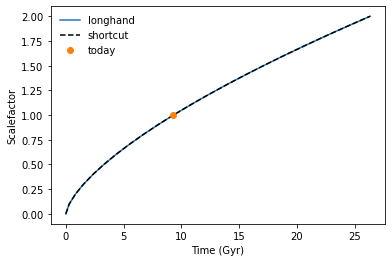

In [6]:
# You might be interested to know that python has some shortcuts.  The whole step above (except the plotting) can be done in one line:
t2_Gyr = np.array([integrate.quad(adotinv_flatmatter, 0, a_end)[0] for a_end in a_arr])/H0y

plt.plot(t_Gyr,a_arr,label='longhand') # Plot original from above
plt.plot(t2_Gyr,a_arr,'--',color='black',label='shortcut') # Plot new one-line calculation to show it is the same
#plt.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
plt.plot(age_Gyr, 1.0,'o',label='today') # Put a dot at the current time
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()

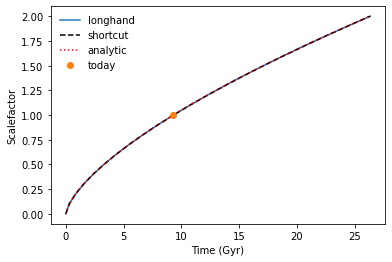

In [9]:
# It's good practise to compare it to the analytic calculation when available
t_analytic_fn = lambda x: 2*x*sqrt(x)/3
t_analytic_Gyr = t_analytic_fn(a_arr)/H0y 

#plt.plot(t_Gyr,a_arr)
#plt.plot(age_Gyr, 1.0,'o') # Put a dot at the current time
#plt.plot(t_analytic_Gyr, a_arr,':',color='red')
#plt.xlabel('Time (Gyr)')
#plt.ylabel('Scalefactor')
#plt.show()

plt.plot(t_Gyr,a_arr,label='longhand') # Plot original from above
plt.plot(t2_Gyr,a_arr,'--',color='black',label='shortcut') # Plot new one-line calculation to show it is the same
plt.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
plt.plot(age_Gyr, 1.0,'o',label='today') # Put a dot at the current time
plt.xlabel('Time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(frameon=False)
plt.show()

age_today_Gyr=9.317443797011302


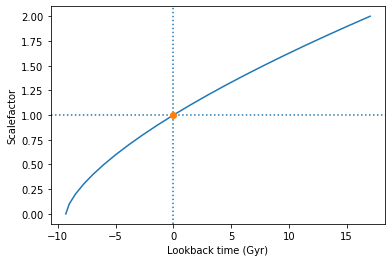

In [10]:
# First calculate the index corresponding to a=1.0.  (Find when |a-1.0| is minimum.  You could also do this by just redoing the integral from 0<a<1, but the way I've set it up above we know we have an a=1 in the array, so we can just find what we've already calculated.)
index_today = np.argmin(np.abs(a_arr - 1.0))

age_today_Gyr = t_analytic_Gyr[index_today]
print(f"{age_today_Gyr=}")

t2_lookback_Gyr = t_analytic_Gyr - age_today_Gyr

# Uncomment the commands below to plot your result
plt.plot(t2_lookback_Gyr,a_arr) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.plot(0.0, 1.0,'o') # Put a dot at the current time
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.show()

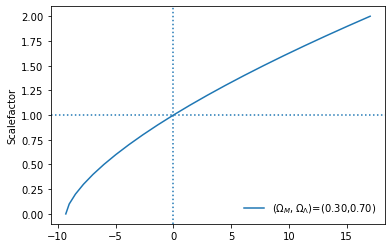

In [12]:
# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot
def adotinv(a,om,ol):
    ok = 1 - om - ol
    adot = a * sqrt(om * 1/(a**3) + ok * 1/(a**2) + ol)
    return 1.0/adot

# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 0.3
ol = 0.7

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_today_Gyr, _ = integrate.quad(adotinv, 0, 1, args=(om,ol))
t_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
t2_lookback_Gyr = t_analytic_Gyr - age_today_Gyr

# Plot this new model (note I've added a label that can be used in the legend)
plt.plot(t2_lookback_Gyr,a_arr,label='$(\Omega_M,\Omega_\Lambda)$=(%.2f,%.2f)'%(om,ol)) 
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')#plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

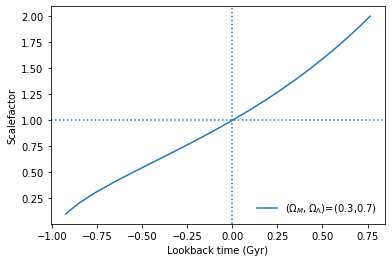

In [13]:
# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot
def adotinv(a,om,ol):
    ok = 1 - om - ol
    adot = a * sqrt(om * 1/(a**3) + ok * 1/(a**2) + ol)
    return 1.0/adot

# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 0.3
ol = 0.7

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_today_Gyr, _ = integrate.quad(adotinv, 0, 1, args=(om,ol))
t_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
# slice [1:] to avoid division by zero error 
t_lookback_Gyr = t_Gyr - t_today_Gyr


# Plot this new model
fig, ax = plt.subplots()
# slice a_arr [1:] for same reason as t_Gyr slice
plt.plot(t_lookback_Gyr,a_arr[1:],label='$(\Omega_M,\Omega_\Lambda)$=(%.1f,%.1f)'%(om,ol))
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')
plt.legend(loc='lower right',frameon=False)
plt.show()

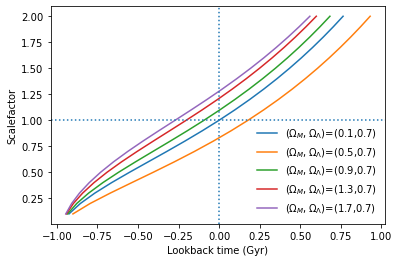

In [14]:
om_arr = np.arange(0.1,2.1,0.4)
ol = 0.7

for om in om_arr:
    t_lookback_Gyr = t_Gyr - t_today_Gyr
    plt.plot(t_lookback_Gyr,a_arr[1:],label='$(\Omega_M,\Omega_\Lambda)$=(%.1f,%.1f)'%(om,ol))
    t_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
   
    
plt.axvline(x=0,linestyle=':') # Plot some crosshairs 
plt.axhline(y=1,linestyle=':')
plt.xlabel('Lookback time (Gyr)')
plt.ylabel('Scalefactor')#plt.legend(loc='lower right',frameon=False)
plt.legend(loc='lower right',frameon=False)
plt.show()